In [1]:
# import library
import pandas as pd

# read data into pandas dataframe (df)
names = pd.read_csv("/Users/Nicole/Documents/Names/baby-names.csv")
# show first five rows of df
names.head()

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy


In [2]:
# show last five rows of df
names.tail()

,year,name,percent,sex
257995,2008,Carleigh,0.000128,girl
257996,2008,Iyana,0.000128,girl
257997,2008,Kenley,0.000127,girl
257998,2008,Sloane,0.000127,girl
257999,2008,Elianna,0.000127,girl


In [3]:
# show where girl names start
names[:][128998:129003]

,year,name,percent,sex
128998,2008,Jensen,0.000089,boy
128999,2008,Yurem,0.000089,boy
129000,1880,Mary,0.072381,girl
129001,1880,Anna,0.026678,girl
129002,1880,Emma,0.020521,girl


In [4]:
# count how often each name appears in the df
pd.set_option('display.max_rows', 10)
names["name"].value_counts(ascending = False)

Jessie       258
Leslie       247
Jean         244
Guadalupe    244
Lee          240
            ... 
Zela           1
Hale           1
Bunk           1
Donaciano      1
Anneliese      1
Name: name, Length: 6782, dtype: int64

In [5]:
# count how many unique names are in the df
names["name"].nunique()

6782

In [6]:
# count how many unique years are in the df
names["year"].nunique()

129

In [7]:
# return names that appear less than once in the df
names['name'].value_counts()[names['name'].value_counts()<2]

Ieshia       1
Prosper      1
Octavie      1
Ignatz       1
Jaeda        1
            ..
Zela         1
Hale         1
Bunk         1
Donaciano    1
Anneliese    1
Name: name, Length: 782, dtype: int64

In [8]:
# print rows where column value for name appeared one time in the df
print(names.groupby("name").filter(lambda x: len(x) == 1))

# show count for how many of these names each year had
u = names.groupby("name").filter(lambda x: len(x) == 1)
u['year'].value_counts()

        year      name   percent   sex
740     1880    Tilden  0.000068   boy
828     1880   Candido  0.000051   boy
831     1880  Clemente  0.000051   boy
854     1880    Friend  0.000051   boy
863     1880     Hence  0.000051   boy
...      ...       ...       ...   ...
257992  2008    Laylah  0.000129  girl
257995  2008  Carleigh  0.000128  girl
257997  2008    Kenley  0.000127  girl
257998  2008    Sloane  0.000127  girl
257999  2008   Elianna  0.000127  girl

[782 rows x 4 columns]


2008    49
1880    43
1881    37
1882    36
1883    28
        ..
1953     1
1950     1
1912     1
1942     1
1941     1
Name: year, Length: 118, dtype: int64

In [9]:
# What boy names are popular for all years?

# split names df into df with boy names
b_names = names[names.sex == 'boy']
# get rows where name appears 129 times, since 129 years are represented in the df
b_names129 = b_names.groupby("name").filter(lambda x: len(x) == 129)
# print number of boy names popular for all years and the names alphabetically
print(b_names129['name'].nunique())
print(b_names129['name'].value_counts().sort_index())

214
Aaron      129
Abraham    129
Adam       129
Adrian     129
Albert     129
          ... 
Wesley     129
Will       129
William    129
Willie     129
Wilson     129
Name: name, Length: 214, dtype: int64


In [10]:
# What girl names are popular for all years?

# split names df into df with girl names
g_names = names[names.sex == 'girl']
# get rows where name appears 129 times
g_names129 = g_names.groupby("name").filter(lambda x: len(x) == 129)
# print number of boy names popular for all years and the names alphabetically
print(g_names129['name'].nunique())
print(g_names129['name'].value_counts().sort_index())

115
Alice       129
Alma        129
Amanda      129
Amelia      129
Amy         129
           ... 
Theresa     129
Veronica    129
Victoria    129
Virginia    129
Vivian      129
Name: name, Length: 115, dtype: int64


In [11]:
# What names are popular for both boys and girls?

# split names df into df with boy names and df with girl names
b_names = names[names.sex == 'boy']
g_names = names[names.sex == 'girl']

# list unique boy names
b_list = []
for n in range (0,129000):
    if b_names['name'][n] not in b_list:
        b_list.append(b_names['name'][n])

# list unique girl names
g_list = []
for n in range (129000,258000):
    if g_names['name'][n] not in g_list:
        g_list.append(g_names['name'][n])

# find intersection of two lists - boy names and girl names
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return len(lst3), lst3

print(intersection(b_list, g_list))

(673, ['John', 'William', 'James', 'Charles', 'George', 'Frank', 'Joseph', 'Thomas', 'Henry', 'Robert', 'Edward', 'Harry', 'Walter', 'Arthur', 'Fred', 'Albert', 'David', 'Louis', 'Joe', 'Charlie', 'Clarence', 'Richard', 'Andrew', 'Daniel', 'Ernest', 'Will', 'Jesse', 'Willie', 'Alfred', 'Roy', 'Tom', 'Elmer', 'Carl', 'Lee', 'Howard', 'Michael', 'Bert', 'Francis', 'Earl', 'Eugene', 'Ralph', 'Claude', 'Paul', 'Edgar', 'Ira', 'Clyde', 'Alexander', 'Floyd', 'Jack', 'Marion', 'Archie', 'Chester', 'Raymond', 'Jessie', 'Alex', 'Leo', 'Ray', 'Sidney', 'Jerry', 'Perry', 'Dave', 'Anthony', 'Eddie', 'Dennis', 'Clifford', 'Harold', 'Matthew', 'Lester', 'Melvin', 'Aaron', 'Norman', 'Christopher', 'Maurice', 'Mark', 'Virgil', 'Leslie', 'Nicholas', 'Alva', 'Harley', 'Timothy', 'Ora', 'Ollie', 'Pearl', 'Scott', 'Ellis', 'Joshua', 'Vernon', 'Austin', 'Lonnie', 'Emery', 'Chris', 'Donald', 'Cecil', 'Christian', 'Glenn', 'Riley', 'Taylor', 'Forrest', 'Louie', 'Morgan', 'Elisha', 'Kenneth', 'Allie', 'Forest

In [12]:
# What names are popular for all years for both boys and girls? 
# Based on earlier value counts, Jessie is the only name appearing 258 times
# Since 129*2=258, Jessie must be popular for both boys and girls in all years

# split names df into df with boy names and df with girl names
b_names = names[names.sex == 'boy']
g_names = names[names.sex == 'girl']
# get boy names appearing 129 times and girl names appearing 129 times
b_names129 = b_names.groupby("name").filter(lambda x: len(x) == 129)
g_names129 = g_names.groupby("name").filter(lambda x: len(x) == 129)

# find intersection of two lists - boy names for all years and girl names for all years
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return len(set(lst3)), set(lst3)

print(intersection(b_names129['name'].tolist(),g_names129['name'].tolist()))

(1, {'Jessie'})


In [13]:
# For each year, what percent of boys born had a name in the top 1000 names?

b_names = names[names.sex == 'boy']
for y in range (1880,2009):
    y_df = b_names[b_names.year == y]
    y_sum = y_df['percent'].sum()
    print(y, y_sum)

1880 0.9307460000000009
1881 0.9304390000000067
1882 0.9275319999999948
1883 0.9287770000000067
1884 0.9272889999999933
1885 0.9255350000000049
1886 0.9259970000000003
1887 0.9246600000000008
1888 0.9232489999999921
1889 0.9243019999999996
1890 0.9207600000000038
1891 0.9203110000000029
1892 0.9179449999999889
1893 0.9202759999999993
1894 0.9167079999999905
1895 0.9168160000000032
1896 0.9152100000000065
1897 0.914832
1898 0.9169149999999965
1899 0.9128799999999987
1900 0.9093469999999995
1901 0.9115499999999991
1902 0.9108220000000015
1903 0.9091130000000073
1904 0.9088990000000009
1905 0.9068799999999965
1906 0.907339999999997
1907 0.904561999999998
1908 0.9057239999999943
1909 0.9025950000000021
1910 0.9032440000000002
1911 0.9059379999999988
1912 0.9127329999999997
1913 0.9136870000000024
1914 0.9128410000000022
1915 0.9157699999999986
1916 0.9160939999999986
1917 0.9169060000000003
1918 0.918966000000001
1919 0.916322999999999
1920 0.9187620000000005
1921 0.9207779999999994
1922 0

In [14]:
# For each year, what percent of girls born had a name in the top 1000 names?

g_names = names[names.sex == 'girl']
for y in range (1880,2009):
    y_df = g_names[g_names.year == y]
    y_sum = y_df['percent'].sum()
    print(y, y_sum)

1880 0.934545999999999
1881 0.9326900000000024
1882 0.9309850000000048
1883 0.9333140000000062
1884 0.931352000000003
1885 0.929994999999996
1886 0.9304020000000034
1887 0.9282259999999982
1888 0.9280310000000033
1889 0.9276300000000044
1890 0.9276189999999971
1891 0.9267929999999976
1892 0.9249440000000031
1893 0.9263450000000039
1894 0.9244650000000022
1895 0.922332999999999
1896 0.9211730000000059
1897 0.9211880000000012
1898 0.918240000000002
1899 0.9181950000000046
1900 0.9129820000000015
1901 0.915371000000009
1902 0.9141739999999977
1903 0.9129580000000018
1904 0.9116650000000031
1905 0.9100790000000035
1906 0.9115530000000023
1907 0.9109180000000012
1908 0.9094900000000028
1909 0.9082049999999992
1910 0.9071299999999994
1911 0.9090400000000025
1912 0.9092409999999987
1913 0.909734000000001
1914 0.9098299999999989
1915 0.9117770000000011
1916 0.9119299999999988
1917 0.9118069999999979
1918 0.9111860000000014
1919 0.9097660000000007
1920 0.9105259999999996
1921 0.9105530000000002

In [15]:
# For each year, how many names made up the top 50% for boys?

b_names = names[names.sex == 'boy']
for y in range (1880,2009):
    y_df = b_names[b_names.year == y]
    x = 0
    y_sum = 0
    while x < len(y_df) and y_sum < 0.50:
        if y_df['percent'][0:x].sum() < 0.50:
            x = x+1
        else:
            y_sum = y_df['percent'][0:x].sum()
            print(y, x, y_sum)

1880 16 0.5049490000000001
1881 16 0.5009459999999999
1882 18 0.5061
1883 18 0.5070020000000001
1884 20 0.5061720000000002
1885 21 0.506009
1886 21 0.5054539999999998
1887 22 0.504964
1888 23 0.5051200000000001
1889 23 0.5025700000000001
1890 24 0.503114
1891 25 0.5014439999999999
1892 26 0.5040379999999999
1893 26 0.501403
1894 28 0.5053990000000002
1895 28 0.503066
1896 29 0.5017029999999999
1897 29 0.5023480000000001
1898 29 0.501746
1899 31 0.5035849999999998
1900 31 0.5051150000000001
1901 32 0.5029700000000001
1902 32 0.502165
1903 33 0.5016189999999999
1904 34 0.5029819999999998
1905 35 0.5025519999999998
1906 35 0.5039129999999999
1907 36 0.5002549999999999
1908 36 0.5013139999999999
1909 37 0.5001159999999999
1910 37 0.500262
1911 37 0.503382
1912 37 0.5047910000000001
1913 37 0.5045589999999999
1914 36 0.5005630000000001
1915 36 0.501575
1916 36 0.503308
1917 35 0.500806
1918 35 0.503642
1919 35 0.502768
1920 33 0.500189
1921 33 0.504396
1922 33 0.504772
1923 32 0.50394
1924 

In [16]:
# For each year, how many names made up the top 50% for girls?

g_names = names[names.sex == 'girl']
for y in range (1880,2009):
    y_df = g_names[g_names.year == y]
    x = 0
    y_sum = 0
    while x < len(y_df) and y_sum < 0.50:
        if y_df['percent'][0:x].sum() < 0.50:
            x = x+1
        else:
            y_sum = y_df['percent'][0:x].sum()
            print(y, x, y_sum)

1880 43 0.503815
1881 43 0.5021319999999999
1882 43 0.501642
1883 44 0.5049130000000002
1884 44 0.502521
1885 45 0.503819
1886 45 0.5002739999999999
1887 46 0.503461
1888 47 0.503606
1889 48 0.5050799999999999
1890 48 0.5012799999999998
1891 49 0.504855
1892 49 0.502514
1893 49 0.5021709999999999
1894 50 0.5000379999999999
1895 51 0.502976
1896 51 0.502134
1897 52 0.5029350000000001
1898 53 0.502313
1899 53 0.501303
1900 55 0.5021140000000003
1901 55 0.5023959999999997
1902 55 0.5013730000000001
1903 55 0.5007879999999999
1904 56 0.502047
1905 56 0.5006789999999998
1906 55 0.5012059999999999
1907 56 0.50348
1908 55 0.5005500000000002
1909 56 0.5027260000000001
1910 57 0.503334
1911 55 0.5005740000000002
1912 55 0.5015049999999999
1913 54 0.5001720000000002
1914 54 0.5011349999999999
1915 53 0.50204
1916 53 0.5001749999999998
1917 53 0.5001669999999999
1918 54 0.5011450000000001
1919 55 0.5012490000000002
1920 55 0.5023129999999999
1921 55 0.50246
1922 56 0.5016550000000002
1923 56 0.50

In [17]:
# Except for 1880, what percent of boy names in each year were also popular in the previous year?

b_names = names[names.sex == 'boy']
for y in range (1881,2009):
    y_next = b_names[b_names.year == y]
    y_last = b_names[b_names.year == y-1]
    overlap = [value for value in y_next['name'].tolist() if value in y_last['name'].tolist()]
    print(y, len(overlap)/1000)

1881 0.819
1882 0.814
1883 0.827
1884 0.83
1885 0.819
1886 0.826
1887 0.815
1888 0.827
1889 0.823
1890 0.827
1891 0.818
1892 0.829
1893 0.84
1894 0.824
1895 0.837
1896 0.842
1897 0.848
1898 0.834
1899 0.832
1900 0.848
1901 0.849
1902 0.847
1903 0.847
1904 0.858
1905 0.85
1906 0.858
1907 0.871
1908 0.858
1909 0.871
1910 0.87
1911 0.882
1912 0.895
1913 0.916
1914 0.936
1915 0.936
1916 0.941
1917 0.937
1918 0.947
1919 0.946
1920 0.948
1921 0.959
1922 0.951
1923 0.95
1924 0.946
1925 0.948
1926 0.946
1927 0.951
1928 0.94
1929 0.945
1930 0.944
1931 0.938
1932 0.932
1933 0.942
1934 0.94
1935 0.94
1936 0.941
1937 0.932
1938 0.932
1939 0.936
1940 0.936
1941 0.946
1942 0.943
1943 0.951
1944 0.951
1945 0.949
1946 0.94
1947 0.939
1948 0.945
1949 0.954
1950 0.946
1951 0.942
1952 0.949
1953 0.95
1954 0.953
1955 0.956
1956 0.947
1957 0.953
1958 0.95
1959 0.953
1960 0.953
1961 0.952
1962 0.955
1963 0.953
1964 0.953
1965 0.952
1966 0.95
1967 0.951
1968 0.95
1969 0.937
1970 0.947
1971 0.943
1972 0.949
1

In [18]:
# Except for 1880, what percent of girl names in each year were also popular in the previous year?

g_names = names[names.sex == 'girl']
for y in range (1881,2009):
    y_next = g_names[g_names.year == y]
    y_last = g_names[g_names.year == y-1]
    overlap = [value for value in y_next['name'].tolist() if value in y_last['name'].tolist()]
    print(y, len(overlap)/1000)

1881 0.83
1882 0.828
1883 0.839
1884 0.834
1885 0.843
1886 0.846
1887 0.858
1888 0.865
1889 0.869
1890 0.869
1891 0.887
1892 0.893
1893 0.894
1894 0.898
1895 0.903
1896 0.899
1897 0.902
1898 0.9
1899 0.909
1900 0.905
1901 0.91
1902 0.909
1903 0.906
1904 0.9
1905 0.916
1906 0.911
1907 0.907
1908 0.904
1909 0.917
1910 0.922
1911 0.918
1912 0.924
1913 0.933
1914 0.943
1915 0.948
1916 0.946
1917 0.946
1918 0.95
1919 0.941
1920 0.945
1921 0.946
1922 0.944
1923 0.944
1924 0.95
1925 0.946
1926 0.951
1927 0.95
1928 0.952
1929 0.953
1930 0.949
1931 0.953
1932 0.949
1933 0.953
1934 0.951
1935 0.951
1936 0.939
1937 0.944
1938 0.944
1939 0.952
1940 0.948
1941 0.953
1942 0.946
1943 0.951
1944 0.944
1945 0.95
1946 0.946
1947 0.951
1948 0.95
1949 0.954
1950 0.955
1951 0.953
1952 0.964
1953 0.955
1954 0.959
1955 0.954
1956 0.948
1957 0.95
1958 0.954
1959 0.957
1960 0.96
1961 0.955
1962 0.964
1963 0.956
1964 0.953
1965 0.945
1966 0.944
1967 0.943
1968 0.957
1969 0.947
1970 0.945
1971 0.941
1972 0.935
1

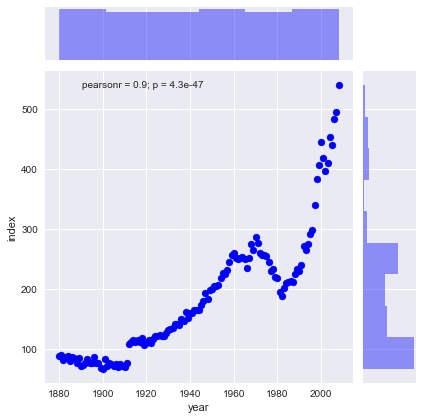

In [19]:
# Plot popularity of the name Jessie by year for boys

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

b_names = names[names.sex == 'boy']
b_Jessie = b_names[b_names.name == 'Jessie']
b_Jessie.reset_index(inplace=True)
b_Jessie['index'] = b_Jessie['index'] % 1000

import seaborn as sns
import matplotlib.pyplot as plt
plot = sns.jointplot(data = b_Jessie, x='year', y='index', color='b')
plt.show()

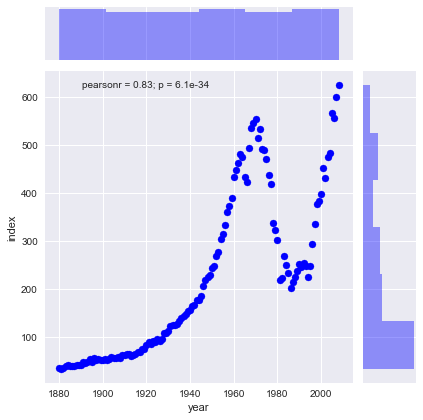

In [20]:
# Plot popularity of the name Jessie by year for girls

pd.options.mode.chained_assignment = None  # default='warn'

g_names = names[names.sex == 'girl']
g_Jessie = g_names[g_names.name == 'Jessie']
g_Jessie.reset_index(inplace=True)
g_Jessie['index'] = g_Jessie['index'] % 1000

import seaborn as sns
import matplotlib.pyplot as plt
plot = sns.jointplot(data = g_Jessie, x='year', y='index', color='b')
plt.show()

In [21]:
# Which girl name changed the most in popularity between two years

pd.options.mode.chained_assignment = None  # default='warn'

g_names = names[names.sex == 'girl']
g_names.reset_index(inplace=True)
g_names['index'] = (g_names['index'] % 1000) + 1
g_ranks = pd.DataFrame(index=range(8036), columns=range(3))

list_gnames = g_names.name.unique()
i = 0
for y in range (1880,1882):
    g_year = g_names[g_names.year == y]
    for n in list_gnames:
        g_year_n = g_year[g_year.name == n]
        if len(g_year_n.index) > 0:
            g_ranks[0][i] = y
            g_ranks[1][i] = n
            rank = g_year_n['index'].tolist()
            g_ranks[2][i] = rank[0]
            i = i+1
        else:
            g_ranks[0][i] = y
            g_ranks[1][i] = n
            g_ranks[2][i] = 1001
            i = i+1
            
g_ranks_y1 = g_ranks[g_ranks[0] == 1880]
g_ranks_y2 = g_ranks[g_ranks[0] == 1881]

y1_y2 = []
for n in list_gnames:
    g_y1 = g_ranks_y1[g_ranks_y1[1] == n]
    g_y2 = g_ranks_y2[g_ranks_y2[1] == n]
    r_change =  g_y1[2].tolist()[0] - g_y2[2].tolist()[0]
    if abs(r_change) < 450:
        r_change = "no change"
    else:
        n_y1_y2 = []
        n_y1_y2.append(n)
        n_y1_y2.append(r_change)
        y1_y2.append(n_y1_y2)
print(y1_y2)

[['Peggy', -514], ['Celestine', -478], ['Edmonia', -479], ['Gena', -473], ['Wilda', -455], ['Isa', 464], ['Adell', 496], ['Celeste', 515], ['Lonie', 476], ['Zadie', 462]]
